In [1]:
import sys
import os

# Ajouter le chemin du répertoire parent de cifar10_classification
project_path = os.path.abspath('..')
if project_path not in sys.path:
    sys.path.append(project_path)
print(project_path)

/home/mkbrad7/afs_epita/ING2/ML_reconnaissance_de_forme/Projet/classifiaction_cifar


In [4]:
# Vérification de l'Indépendance des Features

# Importation des Bibliothèques Nécessaires
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.decomposition import PCA
from cifar10_classification.dataset import prepare_data
from cifar10_classification.features import extract_features

# Chargement et Préparation des Données
X_train, y_train, X_val, y_val, X_test, y_test = prepare_data()

# Extraction des Features HOG
X_train_hog, _ = extract_features(X_train, method='hog', visualize=True)
X_val_hog, _ = extract_features(X_val, method='hog', visualize=True)
X_test_hog, _ = extract_features(X_test, method='hog', visualize=True)



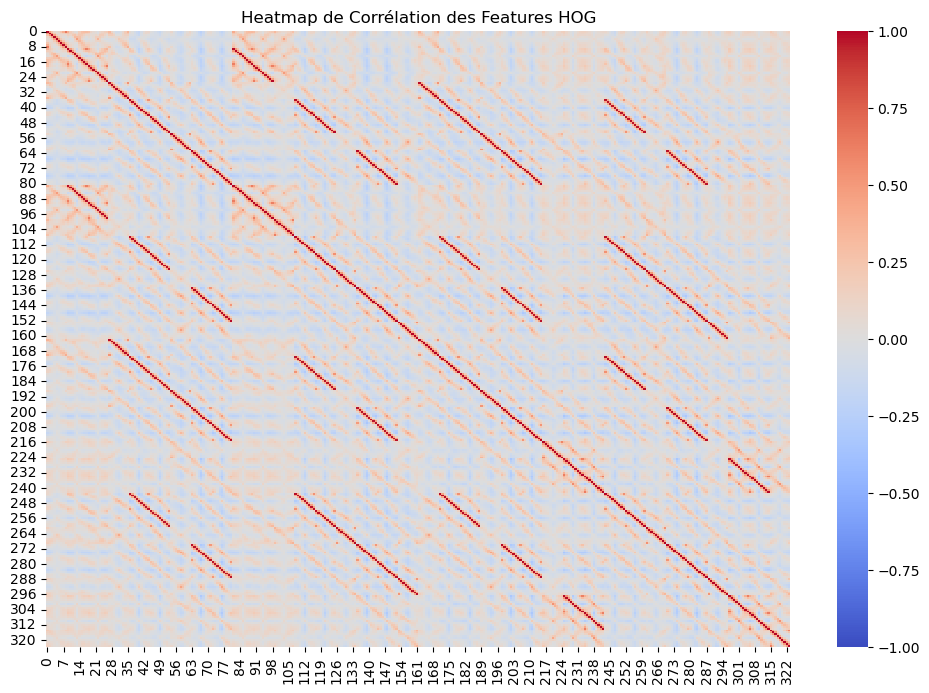

In [5]:
# Visualisation des Corrélations: Heatmap de Corrélation
corr_matrix = np.corrcoef(X_train_hog.T)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap de Corrélation des Features HOG')
plt.savefig('heatmap_hog.png')
plt.show()



In [6]:
# Tests Statistiques de Corrélation
# Exemple avec les deux premières features
feature_1 = X_train_hog[:, 0]
feature_2 = X_train_hog[:, 1]

pearson_corr, _ = pearsonr(feature_1, feature_2)
spearman_corr, _ = spearmanr(feature_1, feature_2)

print(f"Coefficient de Corrélation de Pearson entre feature_1 et feature_2: {pearson_corr}")
print(f"Coefficient de Corrélation de Spearman entre feature_1 et feature_2: {spearman_corr}")



Coefficient de Corrélation de Pearson entre feature_1 et feature_2: 0.4975809967315525
Coefficient de Corrélation de Spearman entre feature_1 et feature_2: 0.629225738935103


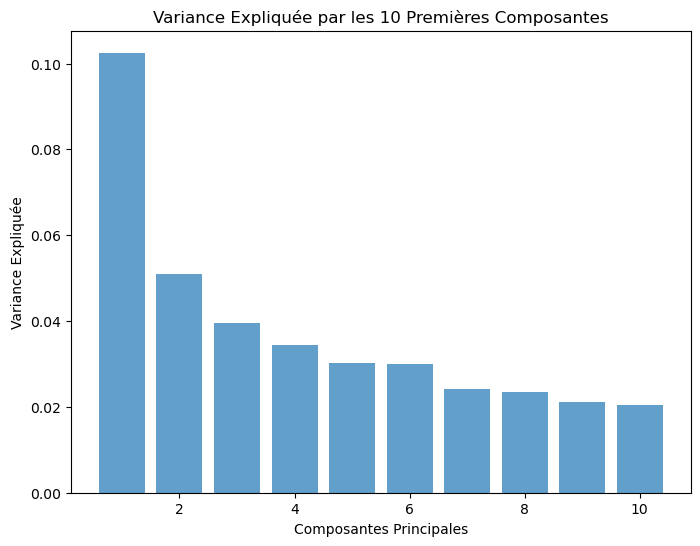

In [7]:
# Analyse en Composantes Principales (PCA)
pca = PCA(n_components=10)
pca.fit(X_train_hog)
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.bar(range(1, 11), explained_variance, alpha=0.7, align='center')
plt.title('Variance Expliquée par les 10 Premières Composantes')
plt.xlabel('Composantes Principales')
plt.ylabel('Variance Expliquée')
plt.savefig('variance_expliquee_pca.png')
plt.show()



In [8]:
# Conclusion sur la redondance des features
total_variance_explained = np.sum(explained_variance)
print(f"Variance totale expliquée par les 10 premières composantes: {total_variance_explained:.2f}")


Variance totale expliquée par les 10 premières composantes: 0.38
